<a href="https://colab.research.google.com/github/Meyssemmedini/PRODIGY_DS_04/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preliminary Steps

##Data mounting

In [1]:
#data mounting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##import packages

In [31]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

##data loading

In [22]:
#read data
df = pd.read_csv ("/content/drive/MyDrive/virtual intern/Prodigy Infotech/datasets/twitter_training.csv", header= None,
names = ['Tweet ID', 'entity', 'sentiment', 'comment'])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet ID   74682 non-null  int64 
 1   entity     74682 non-null  object
 2   sentiment  74682 non-null  object
 3   comment    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


,Tweet ID,entity,sentiment,comment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


#Prepare the data for exploratory analysis purposes

##Data cleaning

###Duplicates

In [11]:
#Count the number of duplicate rows in  DataFrame.
df.duplicated().sum()

2700

In [12]:
#drop the duplicates
df.drop_duplicates(inplace = True)
#check again for duplicates
df.duplicated().sum()

0

###Missing values

In [13]:
#identifiying the missing data
df.isna().sum()

Tweet ID       0
entity         0
sentiment      0
comment      326
dtype: int64

In [14]:
#checking the % of missing val in each feature
(df.isna().sum() / len(df) * 100)[df.isna().sum() > 0]

comment    0.452891
dtype: float64

####Imputing missing data

In [15]:
# Filling missing values in 'comment' with missing
df['comment'].fillna('MISSING', inplace= True)

In [16]:
## Check for any remaining missing values after imputing
df.isna().sum()

Tweet ID     0
entity       0
sentiment    0
comment      0
dtype: int64

###checking for inconsistencies in data

####1- for Data types

In [17]:
#checking Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71982 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet ID   71982 non-null  int64 
 1   entity     71982 non-null  object
 2   sentiment  71982 non-null  object
 3   comment    71982 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


everything seems correct

####2- for inconsistent values in categorical columns

In [18]:
# Displaying value counts for each categorical column to check inconsistent values
for column in df.select_dtypes(include='object').columns:
    print(f'Value counts for {column}:')
    print(df[column].value_counts())
    print('\n')

Value counts for entity:
TomClancysRainbowSix                 2344
Verizon                              2328
MaddenNFL                            2324
CallOfDuty                           2322
Microsoft                            2319
NBA2K                                2306
WorldOfCraft                         2304
LeagueOfLegends                      2303
TomClancysGhostRecon                 2301
Facebook                             2293
ApexLegends                          2289
Battlefield                          2267
Amazon                               2264
CallOfDutyBlackopsColdWar            2261
johnson&johnson                      2261
FIFA                                 2245
Dota2                                2229
Overwatch                            2229
Hearthstone                          2227
HomeDepot                            2226
Xbox(Xseries)                        2222
GrandTheftAuto(GTA)                  2214
Borderlands                          2211
Nvidia   

# Data visualization & Analysis

In [34]:
# Sentiment Distribution
sentiment_counts = df['sentiment'].value_counts()
fig_sentiment = px.bar(sentiment_counts, x=sentiment_counts.index, y=sentiment_counts.values,
                       labels={'x': 'Sentiment', 'y': 'Count'},
                       title='Sentiment Distribution',
                       color=sentiment_counts.index
                      )
fig_sentiment.show()

Upon examining the Sentiment Distribution, it is evident that negative sentiments dominate, constituting the highest proportion at 22.542k. Following closely are positive sentiments at 20.832k, neutral sentiments at 18.318k, and irrelevant sentiments at 12.99k.

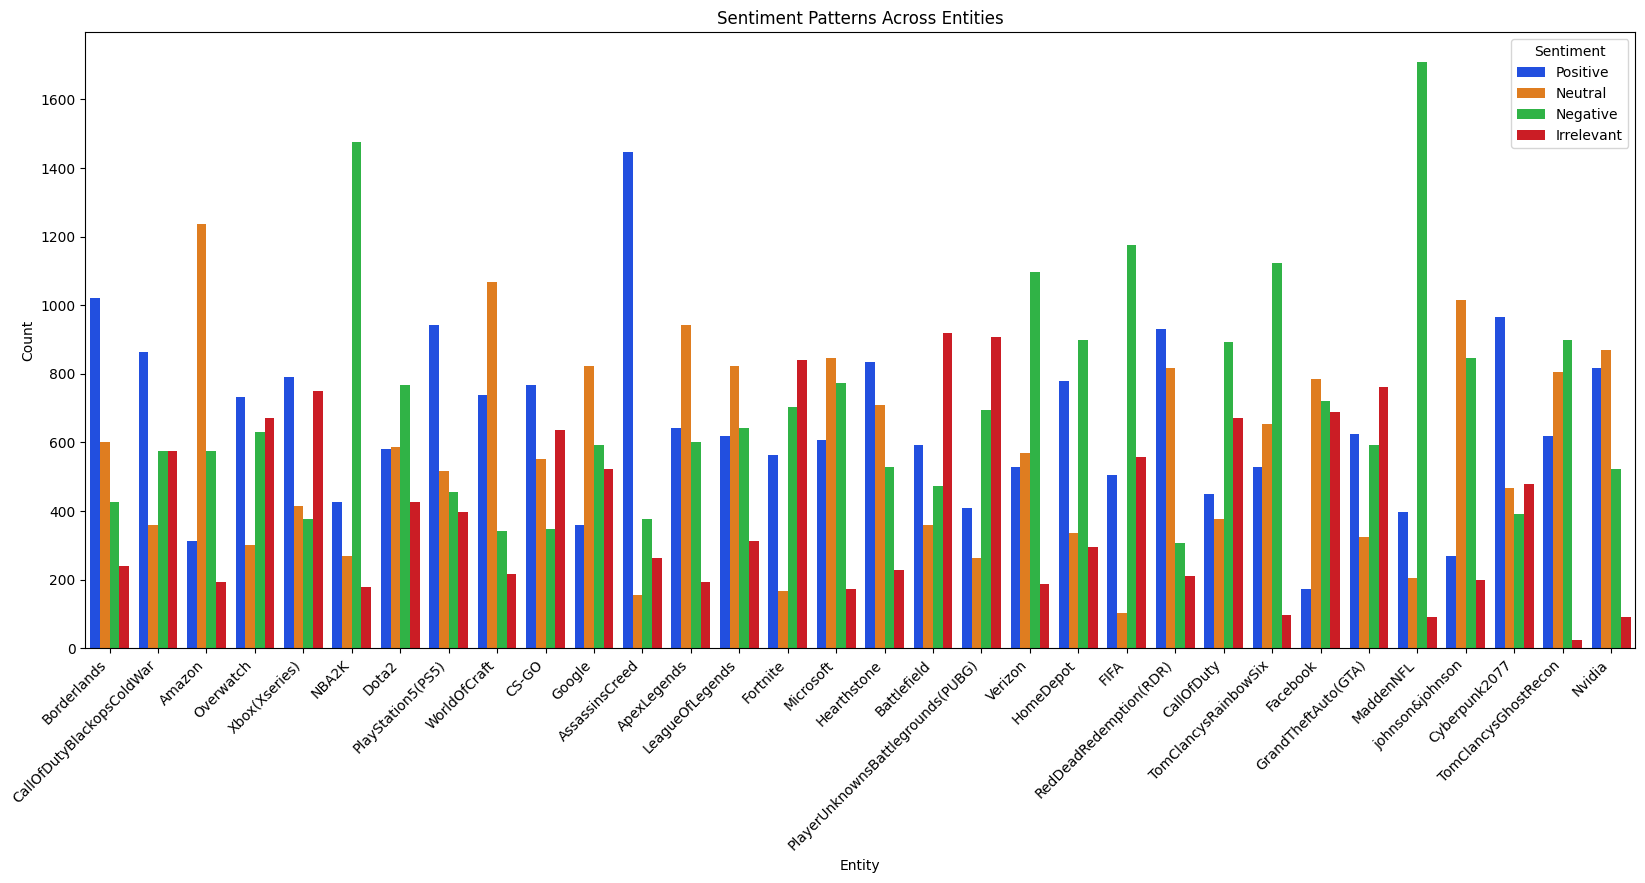

In [43]:
# Sentiment Patterns Across Entities
plt.figure(figsize=(20, 8))
sns.countplot(x='entity', hue='sentiment', data=df, palette='bright')
plt.title('Sentiment Patterns Across Entities')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.show()

Observing the Sentiment Patterns Across Entities, noteworthy insights emerge. AssassinsCreed stands out with the most positive sentiment, boasting 1446 instances, while Facebook exhibits the least positive sentiment, registering only 174 occurrences. Amazon takes the lead in neutral sentiment with an impressive count of 1236, whereas FIFA records the lowest neutral sentiment with just 102 instances. In terms of negative sentiment, MaddenNFL dominates with the highest count of 1710, while RedDeadRedemption(RDR) lags behind with 306. Turning to irrelevant sentiment, Battlefield commands the highest count at 918, while TomClancysGhostRecon reports the lowest count at 24.

In conclusion, this analysis sheds light on the diverse sentiment patterns across different entities. Notably, entities such as AssassinsCreed, MaddenNFL, Amazon, and Battlefield exhibit varying degrees of sentiment, offering valuable insights into the public's perceptions and attitudes towards these entities in the social media landscape.

Text(95.7222222222222, 0.5, 'Entity')

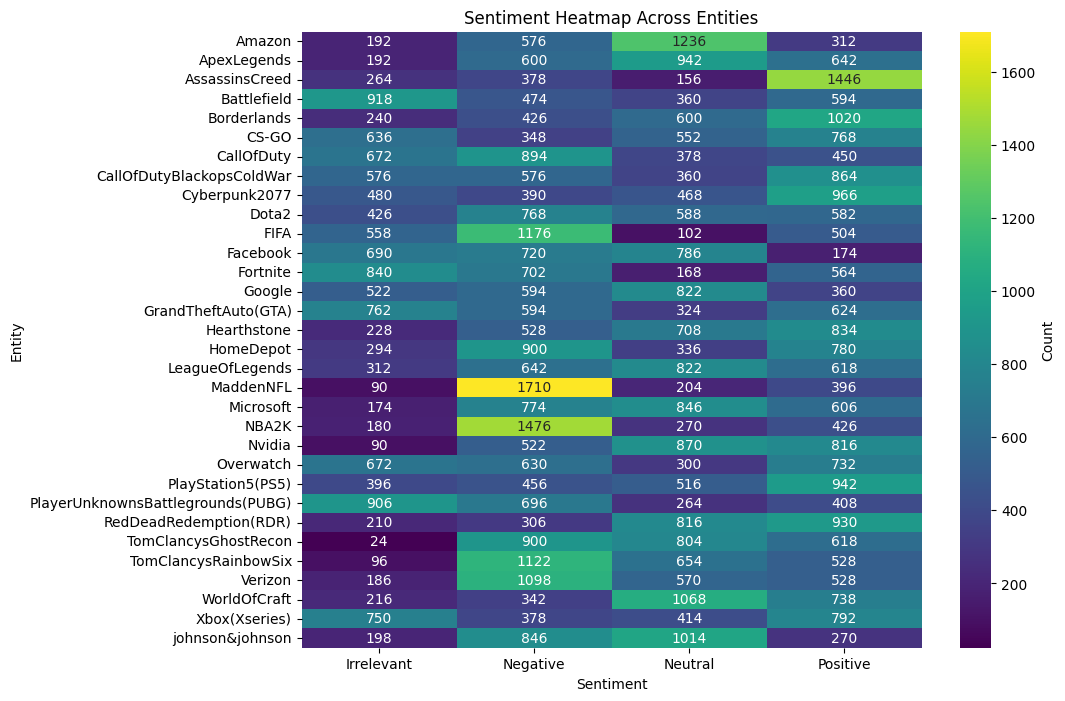

In [44]:
# Sentiment Heatmap
sentiment_entity_matrix = df.groupby(['entity', 'sentiment']).size().unstack().fillna(0)
plt.figure(figsize=(10, 8))
sns.heatmap(sentiment_entity_matrix, annot=True, cmap='viridis', fmt='g', cbar_kws={'label': 'Count'})
plt.title('Sentiment Heatmap Across Entities')
plt.xlabel('Sentiment')
plt.ylabel('Entity')

positive sentiments notably prevail for entities like AssassinsCreed, Amazon, while negative sentiments are more prominent for MaddenNFL. These insights offer a glimpse into favorable and unfavorable perceptions within the social media landscape.

Text(0.5, 1.0, 'Word Cloud of Comments')

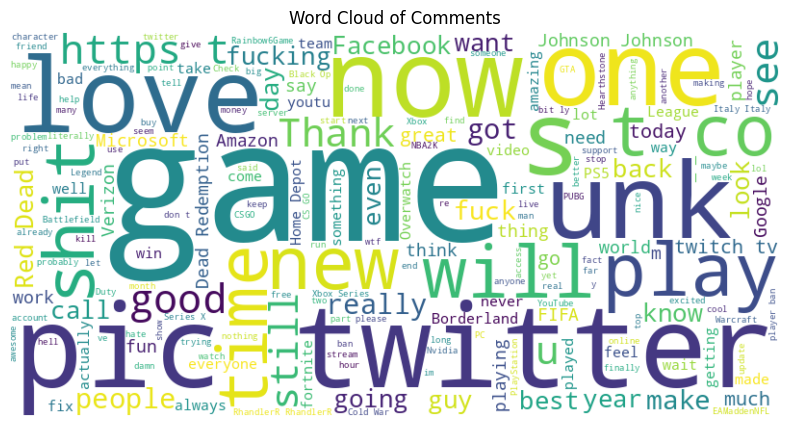

In [47]:
# Word Cloud
text = ' '.join(df['comment'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments')